In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
#Carga desde un archivo .csv sin indice
df = pd.read_csv('MexiLim.csv')
df= df.drop(['Unnamed: 0'], axis=1)
df.head(5)


id                          listing_url       scrape_id last_scraped  \
0   35797   https://www.airbnb.com/rooms/35797  20241227033128   2024-12-27   
1   44616   https://www.airbnb.com/rooms/44616  20241227033128   2024-12-28   
2   67703   https://www.airbnb.com/rooms/67703  20241227033128   2024-12-28   
3   70644   https://www.airbnb.com/rooms/70644  20241227033128   2024-12-27   
4  131610  https://www.airbnb.com/rooms/131610  20241227033128   2024-12-28   

            source                                              name  \
0      city scrape                                       Villa Dante   
1      city scrape                                      Condesa Haus   
2      city scrape                 2 bedroom apt. deco bldg, Condesa   
3      city scrape  Beautiful light Studio Coyoacan- full equipped !   
4  previous scrape                                    MARIA DEL ALMA   

                                         description  \
0  Dentro de Villa un estudio de arte con futon, ...   
1  A new concept of hosting in mexico through a b...   
2  Comfortably furnished, sunny, 2 bedroom apt., ...   
3  COYOACAN designer studio quiet & safe! well eq...   
4                                             Casita   

                               neighborhood_overview  \
0  Santa Fe Shopping Mall, Interlomas Park and th...   
1                                                      
2                                                      
3  Coyoacan is a beautiful neighborhood famous fo...   
4                                                      

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/f395ab78-1185...   153786  ...   
1  https://a0.muscache.com/pictures/251410/ec75fe...   196253  ...   
2  https://a0.muscache.com/pictures/3281720/6f078...   334451  ...   
3  https://a0.muscache.com/pictures/f397d2da-d045...   212109  ...   
4  https://a0.muscache.com/pictures/837085/b9ed71...   647454  ...   

  review_scores_cleanliness review_scores_checkin review_scores_communication  \
0                      4.80                  4.80                        4.80   
1                      4.70                  4.87                        4.78   
2                      4.76                  4.94                        4.92   
3                      4.96                  4.96                        4.98   
4                      4.80                  4.80                        4.80   

  review_scores_location review_scores_value calculated_host_listings_count  \
0                   4.80                4.70                            1.0   
1                   4.98                4.48                            8.0   
2                   4.98                4.92                            2.0   
3                   4.96                4.92                            3.0   
4                   4.80                4.70                            3.0   

  calculated_host_listings_count_entire_homes  \
0                                         1.0   
1                                         4.0   
2                                         2.0   
3                                         2.0   
4                                         1.0   

  calculated_host_listings_count_private_rooms  \
0                                          0.0   
1                                          1.0   
2                                          0.0   
3                                          1.0   
4                                          2.0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                         0.0              1.80  
1                                         0.0              0.40  
2                                         0.0              0.31  
3                                         0.0              0.84  
4                                         0.0              1.80  

[5 rows x 75 columns]

In [125]:
print(df.isnull().sum())

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 75, dtype: int64


In [126]:
# Mostrar todas las columnas del DataFrame
print(df.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'bathrooms_text', 'amenities',
       'calendar_updated', 'has_availability', 'calendar_last_scraped',
       'first_review', 'last_review', 'license', 'instant_bookable',
       'host_listings_count', 'host_total_listings_count', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_mini

In [127]:
for col in ['host_acceptance_rate', 'host_response_rate']:
    df[col] = df[col].astype(str).str.replace('%', '', regex=False)  # Eliminar el signo %
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convertir a float, dejando NaN si hay errores

In [128]:
df.host_is_superhost = df.host_is_superhost.replace({'f': 0, 't': 1, 'False': 0})
df.host_identity_verified = df.host_identity_verified.replace({'f': 0, 't':1,'False':0})
df.instant_bookable = df.instant_bookable.replace({'f': 0, 't':1,'False':0})

C:\Users\luisb\AppData\Local\Temp\ipykernel_12172\811158007.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.host_is_superhost = df.host_is_superhost.replace({'f': 0, 't': 1, 'False': 0})
C:\Users\luisb\AppData\Local\Temp\ipykernel_12172\811158007.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.host_identity_verified = df.host_identity_verified.replace({'f': 0, 't':1,'False':0})
C:\Users\luisb\AppData\Local\Temp\ipykernel_12172\811158007.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be 

In [129]:
fil1= df[df['room_type'] == "Entire home/apt"]
fil1

id                                       listing_url  \
0                    35797                https://www.airbnb.com/rooms/35797   
1                    44616                https://www.airbnb.com/rooms/44616   
2                    67703                https://www.airbnb.com/rooms/67703   
3                    70644                https://www.airbnb.com/rooms/70644   
5                   165772               https://www.airbnb.com/rooms/165772   
...                    ...                                               ...   
26274  1318867401520817083  https://www.airbnb.com/rooms/1318867401520817083   
26275  1318902377711671170  https://www.airbnb.com/rooms/1318902377711671170   
26277  1318960023050066631  https://www.airbnb.com/rooms/1318960023050066631   
26279  1319078571963617776  https://www.airbnb.com/rooms/1319078571963617776   
26280  1319509843525848258  https://www.airbnb.com/rooms/1319509843525848258   

            scrape_id last_scraped       source  \
0      20241227033128   2024-12-27  city scrape   
1      20241227033128   2024-12-28  city scrape   
2      20241227033128   2024-12-28  city scrape   
3      20241227033128   2024-12-27  city scrape   
5      20241227033128   2024-12-28  city scrape   
...               ...          ...          ...   
26274  20241227033128   2024-12-28  city scrape   
26275  20241227033128   2024-12-27  city scrape   
26277  20241227033128   2024-12-27  city scrape   
26279  20241227033128   2024-12-28  city scrape   
26280  20241227033128   2024-12-28  city scrape   

                                                    name  \
0                                            Villa Dante   
1                                           Condesa Haus   
2                      2 bedroom apt. deco bldg, Condesa   
3       Beautiful light Studio Coyoacan- full equipped !   
5          BEST 5 Bedroom HOUSE IN S. Miguel Chapultepec   
...                                                  ...   
26274                    Condesa | CÃ©ntrico y PrÃ¡ctico   
26275                 Eventos, filmaciones o Alojamiento   
26277                     Departamento amueblado en CDMX   
26279          3 recÃ¡maras 3 baÃ±os con estacionamiento   
26280  Loft ejecutivo junto a Reforma y a pasos del Ã...   

                                             description  \
0      Dentro de Villa un estudio de arte con futon, ...   
1      A new concept of hosting in mexico through a b...   
2      Comfortably furnished, sunny, 2 bedroom apt., ...   
3      COYOACAN designer studio quiet & safe! well eq...   
5      Welcome to Your Home in Mexico City<br />We ha...   
...                                                  ...   
26274  Stay in this beautiful apartment just across f...   
26275  Welcome to Hotel Boutique Casa Alebrije<br /><...   
26277  Enjoy a cozy condominium in the heart of Mexic...   
26279  It has: High Speed Internet, Equipped Kitchen,...   
26280  Stylish and comfortable Loft a few steps from ...   

                                   neighborhood_overview  \
0      Santa Fe Shopping Mall, Interlomas Park and th...   
1                                                          
2                                                          
3      Coyoacan is a beautiful neighborhood famous fo...   
5      San Miguel Chapultepec is the best kept secret...   
...                                                  ...   
26274                                                      
26275                                                      
26277                                                      
26279  La EscandÃ³n II is a lively neighborhood, know...   
26280                                                      

                                             picture_url    host_id  ...  \
0      https://a0.muscache.com/pictures/f395ab78-1185...     153786  ...   
1      https://a0.muscache.com/pictures/251410/ec75fe...     196253  ...   
2      https://a0.muscache.com/pictures/3281720/6f078...   

In [130]:
fil2= df[df['room_type'] == "Private room"]
fil2

id                                       listing_url  \
4                   131610               https://www.airbnb.com/rooms/131610   
6                   171109               https://www.airbnb.com/rooms/171109   
10                  517503               https://www.airbnb.com/rooms/517503   
12                  544105               https://www.airbnb.com/rooms/544105   
13                  567176               https://www.airbnb.com/rooms/567176   
...                    ...                                               ...   
26253  1317671217114827820  https://www.airbnb.com/rooms/1317671217114827820   
26266  1318410958391047737  https://www.airbnb.com/rooms/1318410958391047737   
26268  1318524466881825526  https://www.airbnb.com/rooms/1318524466881825526   
26272  1318856955301505822  https://www.airbnb.com/rooms/1318856955301505822   
26276  1318906185008171760  https://www.airbnb.com/rooms/1318906185008171760   

            scrape_id last_scraped           source  \
4      20241227033128   2024-12-28  previous scrape   
6      20241227033128   2024-12-27      city scrape   
10     20241227033128   2024-12-27      city scrape   
12     20241227033128   2024-12-27      city scrape   
13     20241227033128   2024-12-27      city scrape   
...               ...          ...              ...   
26253  20241227033128   2024-12-27      city scrape   
26266  20241227033128   2024-12-28      city scrape   
26268  20241227033128   2024-12-28      city scrape   
26272  20241227033128   2024-12-28      city scrape   
26276  20241227033128   2024-12-28      city scrape   

                                                    name  \
4                                         MARIA DEL ALMA   
6                        Cool room near WTC and Metrobus   
10                            Nice big room near airport   
12     Polanco great location! Priv Room in Shared Apart   
13                                   Un descanso en CDMX   
...                                                  ...   
26253                  HabitaciÃ³n privada independiente   
26266                             Bonsai (Casa Amarilla)   
26268                       CÃ³modo cuarto en la Condesa   
26272                      Hermosa habitaciÃ³n con baÃ±o   
26276                             Suite Dumas Polanco 8D   

                                             description  \
4                                                 Casita   
6      Stay in a private room 2 blocks away from WTC,...   
10     Very spacious room,illuminated,easy access to ...   
12     Private room with full private bathroom in SHA...   
13                                                Casita   
...                                                  ...   
26253           Central place and close to the Metrobus.   
26266  Enjoy the simplicity of this quiet and central...   
26268  Quiet room with double bed. Closet for clothes...   
26272  You will love this beautiful king room with pr...   
26276  You will love this adorable place to stay, kin...   

                                   neighborhood_overview  \
4                                                          
6      Great location, feel comfortable and secure at...   
10     Is a popular street, a lot of cars, and people...   
12     Literally you walk to four malls around.<br />...   
13     the neighborhood is very chevere, the area is ...   
...                                                  ...   
26253                                                      
26266                                                      
26268                                                      
26272                                                      
26276                                                      

                                             picture_url    host_id  ...  \
4      https://a0.muscache.com/pictures/837085/b9ed71...     647454  ...   
6      https://a0.muscache.com/pictures/16040866/8b0a...     816295  ...   
10     http

In [131]:
fil3= df[df['room_type'] == "Hotel room"]
fil3

id                                       listing_url  \
14                  571166               https://www.airbnb.com/rooms/571166   
29                  281134               https://www.airbnb.com/rooms/281134   
52                  737328               https://www.airbnb.com/rooms/737328   
76                  865012               https://www.airbnb.com/rooms/865012   
77                  868843               https://www.airbnb.com/rooms/868843   
...                    ...                                               ...   
23066  1191430079828817253  https://www.airbnb.com/rooms/1191430079828817253   
23067  1191430130484570539  https://www.airbnb.com/rooms/1191430130484570539   
23068  1191430238014754309  https://www.airbnb.com/rooms/1191430238014754309   
23069  1191430521084135024  https://www.airbnb.com/rooms/1191430521084135024   
23070  1191431981766770022  https://www.airbnb.com/rooms/1191431981766770022   

            scrape_id last_scraped           source  \
14     20241227033128   2024-12-28      city scrape   
29     20241227033128   2024-12-28  previous scrape   
52     20241227033128   2024-12-28  previous scrape   
76     20241227033128   2024-12-28  previous scrape   
77     20241227033128   2024-12-28      city scrape   
...               ...          ...              ...   
23066  20241227033128   2024-12-28      city scrape   
23067  20241227033128   2024-12-28      city scrape   
23068  20241227033128   2024-12-28      city scrape   
23069  20241227033128   2024-12-28      city scrape   
23070  20241227033128   2024-12-28      city scrape   

                                                    name  \
14     MODERN/HIP FURNISHED APARTMENT ( S1 Condesa Haus)   
29                    COOL PENT HOUSE APARTMENT @CONDESA   
52                     Business Suite BEIGE near Reforma   
76                   Business Suite RED near Reforma Av.   
77                    Business Suite PURPLE near Reforma   
...                                                  ...   
23066       4 Modern Units Just Steps from the Downtown!   
23067  4 Units with City View, Steps from Alameda Cen...   
23068          Rooftop Deck with Majestic Views! 4 Units   
23069    Near Alameda Central, Bike Tours, Museum Treats   
23070      Steps from the Historic District! Bike Tours!   

                                             description  \
14     This is a one bedroom furnished apartment in t...   
29     Amazing Pent House apartment in the heart fo C...   
52     Beautiful suite located on 1st floor, facing s...   
76     Beautiful suite located on 2nd floor, facing s...   
77     Small suite located on 1st floor facing our in...   
...                                                  ...   
23066  Stay in the heart of Mexico City and be near t...   
23067  Stay in the heart of Mexico City and be near t...   
23068  Stay in the heart of Mexico City and be near t...   
23069  Stay in the heart of Mexico City and be near t...   
23070  Stay in the heart of Mexico City and be near t...   

                                   neighborhood_overview  \
14                                                         
29                                                         
52     The area in which our service is located stand...   
76                                                         
77                                                         
...                                                  ...   
23066  - \tPulque Museum â 0.2 miles; <br />-    \t...   
23067  - \tPulque Museum â 0.2 miles; <br />-    \t...   
23068  - \tPulque Museum â 0.2 miles; <br />-    \t...   
23069  - \tPulque Museum â 0.2 miles; <br />-    \t...   
23070  - \tPulque Museum â 0.2 miles; <br />-    \t...   

                                             picture_url    host_id  ...  \
14     https://a0.muscache.com/pictures/7058623/82999...     196253  ...   
29     https://a0.muscache.com/pictures/5754595/e5ec9...     196253  ...   
52     http

In [132]:
fil4= df[df['room_type'] == "Shared room"]
fil4

id                                       listing_url  \
354                5272066              https://www.airbnb.com/rooms/5272066   
2115              19037182             https://www.airbnb.com/rooms/19037182   
3163              24272530             https://www.airbnb.com/rooms/24272530   
4035              29219909             https://www.airbnb.com/rooms/29219909   
4270              30267468             https://www.airbnb.com/rooms/30267468   
...                    ...                                               ...   
25922  1304877209649114670  https://www.airbnb.com/rooms/1304877209649114670   
26057  1308154403275925595  https://www.airbnb.com/rooms/1308154403275925595   
26257  1318169352966707271  https://www.airbnb.com/rooms/1318169352966707271   
26259  1318184586582469163  https://www.airbnb.com/rooms/1318184586582469163   
26278  1318997244771691320  https://www.airbnb.com/rooms/1318997244771691320   

            scrape_id last_scraped       source  \
354    20241227033128   2024-12-27  city scrape   
2115   20241227033128   2024-12-27  city scrape   
3163   20241227033128   2024-12-27  city scrape   
4035   20241227033128   2024-12-27  city scrape   
4270   20241227033128   2024-12-28  city scrape   
...               ...          ...          ...   
25922  20241227033128   2024-12-27  city scrape   
26057  20241227033128   2024-12-27  city scrape   
26257  20241227033128   2024-12-27  city scrape   
26259  20241227033128   2024-12-27  city scrape   
26278  20241227033128   2024-12-27  city scrape   

                                                    name  \
354                                        Gay UNAM Room   
2115                 HABITACIÃN CON SERVICIOS INCLUIDOS   
3163   TRENDY HOSTEL / Yes we speak English, Welcome !!!   
4035           Trendy Back Packer / Yes we speak English   
4270    Perfect Parque Mexico stay: cozy large apartment   
...                                                  ...   
25922                     HabitaciÃ³n compartida hombres   
26057                   Hortensia 46 B 1 Cama y Desayuno   
26257    Cama âFrida Khaloâ en la Casa del Mochilero   
26259                           Cama âRufino Tamayoâ   
26278                        hospedaje en CoyoacÃ¡n CDMX   

                                             description  \
354    We are a Gay couple, which offers a shared roo...   
2115   Spacious room, a double and single bunk bed. F...   
3163                                              Casita   
4035                                              Casita   
4270   Relax and Discover the magic: <br />Large, bri...   
...                                                  ...   
25922  Shared room ONLY MALE <br />5 single bunks. <b...   
26057  Discover it You won't want to leave this uniqu...   
26257  Enjoy the simplicity of this quiet and central...   
26259  Enjoy the simplicity of this space in a centra...   
26278  Relax with the whole family in this accommodat...   

                                   neighborhood_overview  \
354    The legend says that our neighborhood it was s...   
2115                                                       
3163                                                       
4035                                                       
4270                                                       
...                                                  ...   
25922                                                      
26057                                                      
26257                                                      
26259                                                      
26278                                                      

                                             picture_url    host_id  ...  \
354    https://a0.muscache.com/pictures/65876833/7114...   27291692  ...   
2115   https://a0.muscache.com/pictures/5f71bf47-87fa...   47398486  ...   
3163   https://a0.muscache.com/pictures/7ca3df9a-462a...  1

In [133]:
valores_nulos = df.isnull().sum().sum()
valores_nulos

np.int64(97973)

<Axes: xlabel='room_type', ylabel='price'>

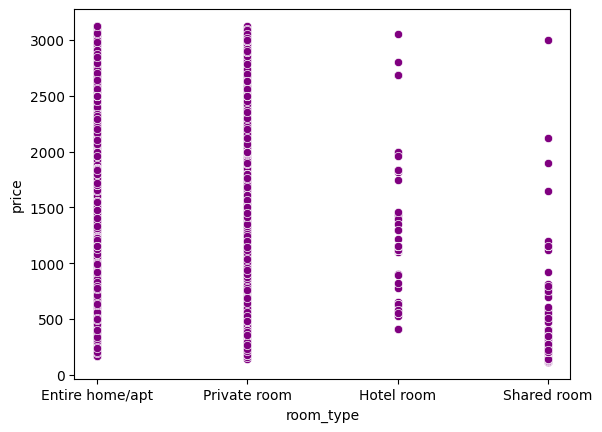

In [134]:
sns.scatterplot(x='room_type', y='price', color="purple", data=fil1)
sns.scatterplot(x='room_type', y='price', color="purple", data=fil2)
sns.scatterplot(x='room_type', y='price', color="purple", data=fil3)
sns.scatterplot(x='room_type', y='price', color="purple", data=fil4)

<Axes: xlabel='room_type', ylabel='price'>

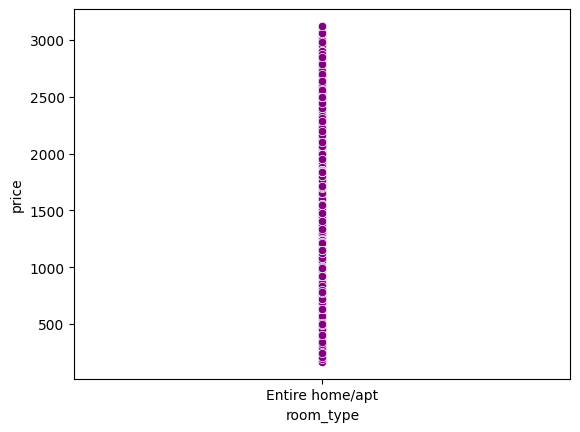

In [135]:
sns.scatterplot(x='room_type', y='price', color="purple", data=fil1)




<Axes: xlabel='room_type', ylabel='price'>

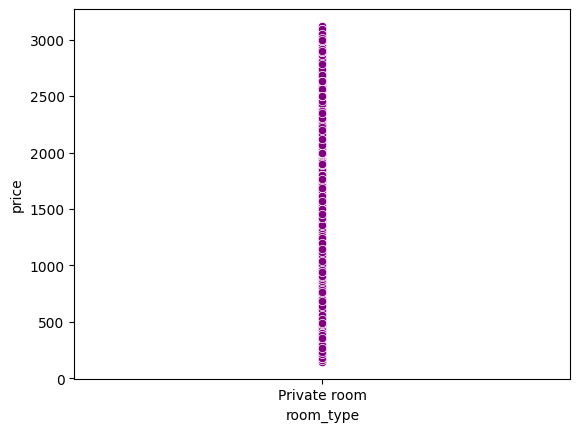

In [136]:
sns.scatterplot(x='room_type', y='price', color="purple", data=fil2)


<Axes: xlabel='room_type', ylabel='price'>

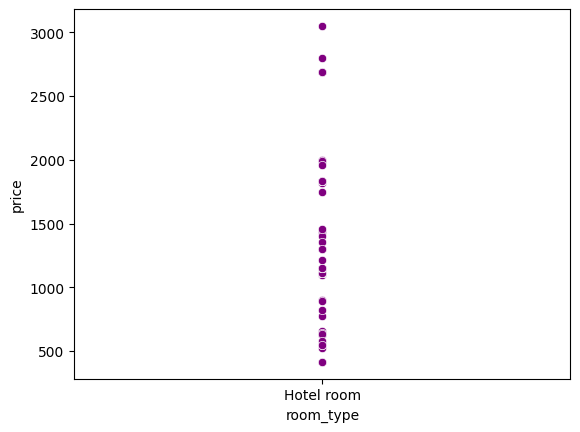

In [137]:
sns.scatterplot(x='room_type', y='price', color="purple", data=fil3)


<Axes: xlabel='room_type', ylabel='price'>

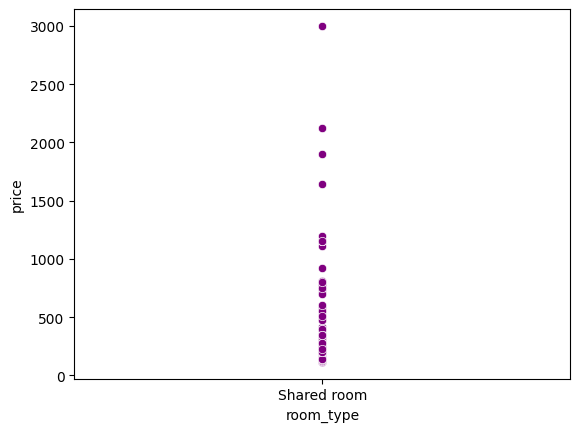

In [138]:
sns.scatterplot(x='room_type', y='price', color="purple", data=fil4)


<Axes: xlabel='host_is_superhost', ylabel='price'>

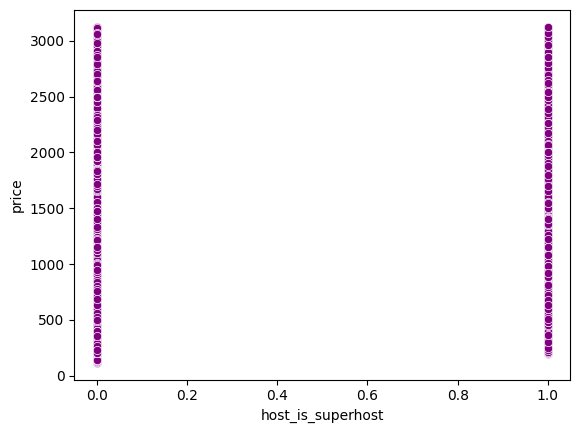

In [139]:
sns.scatterplot(x='host_is_superhost', y='price', color="purple", data=df)


<Axes: xlabel='accommodates', ylabel='bathrooms'>

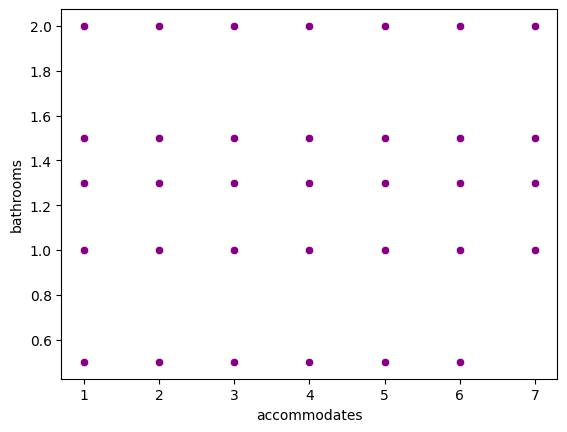

In [140]:
sns.scatterplot(x='accommodates', y='bathrooms', color="purple", data=df)
#host_acceptance_rate

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

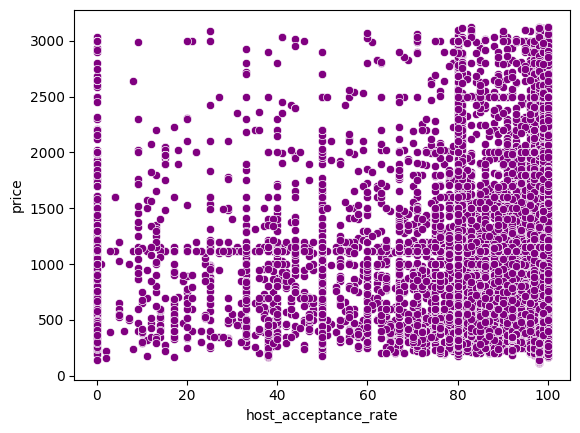

In [141]:
sns.scatterplot(x='host_acceptance_rate', y='price', color="purple", data=df)


<Axes: xlabel='accommodates', ylabel='bathrooms'>

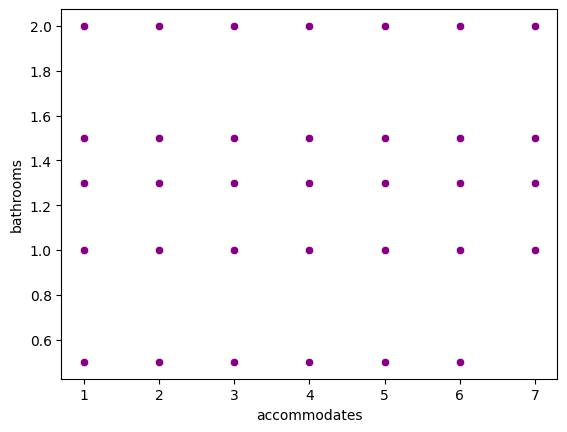

In [142]:
sns.scatterplot(x='accommodates', y='bathrooms', color="purple", data=df)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

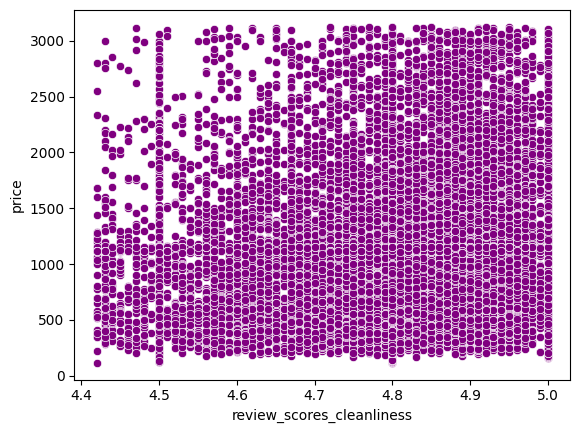

In [143]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color="purple", data=df)

<Axes: xlabel='host_identity_verified', ylabel='price'>

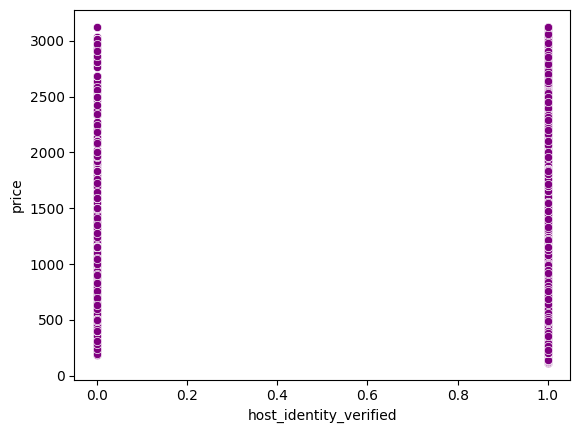

In [144]:
sns.scatterplot(x='host_identity_verified', y='price', color="purple", data=df)

<Axes: xlabel='instant_bookable', ylabel='price'>

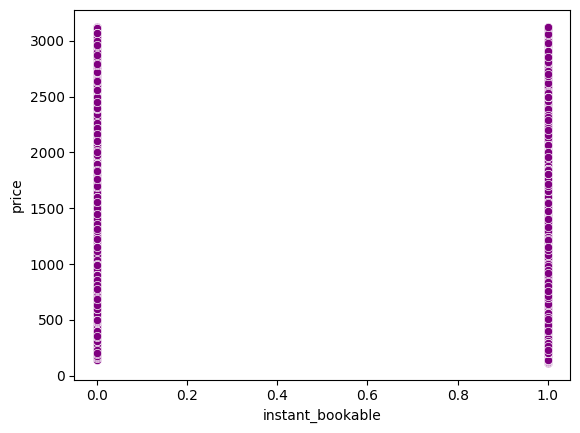

In [145]:
sns.scatterplot(x='instant_bookable', y='price', color="purple", data=df)

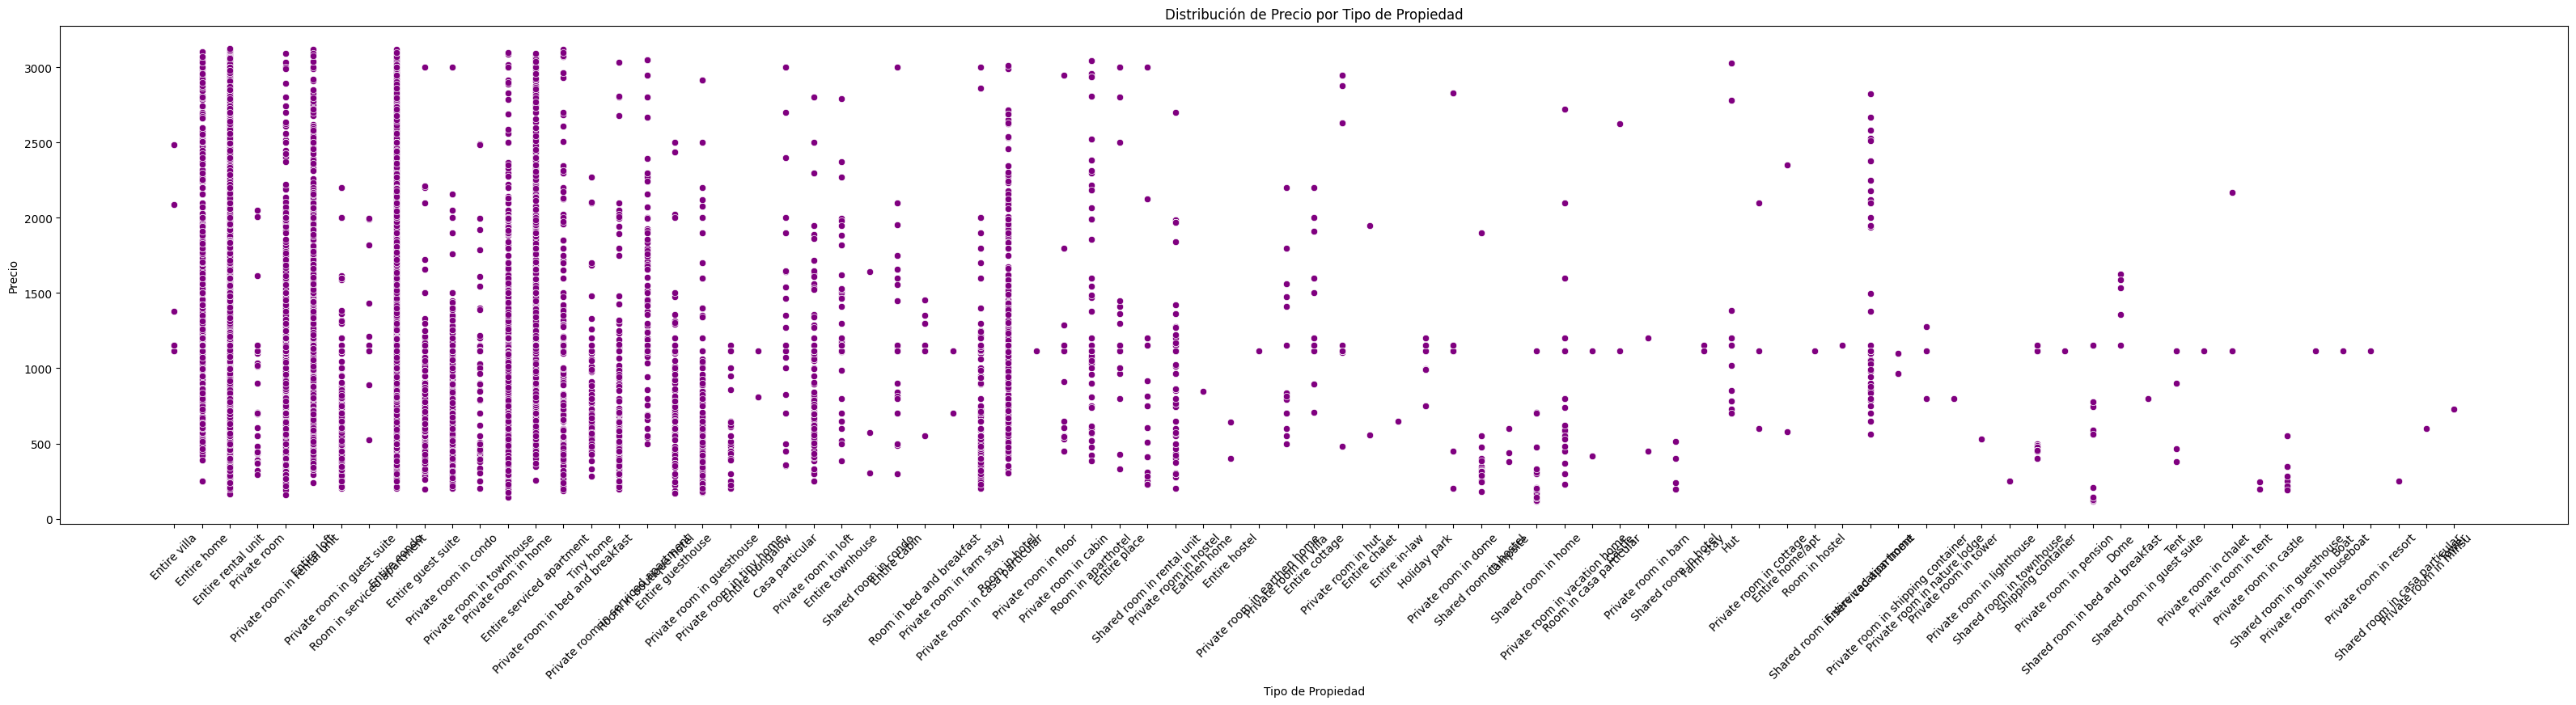

In [146]:
plt.figure(figsize=(40, 8))  # Ajusta el tamaño de la figura
sns.scatterplot(x='property_type', y='price', color="purple", data=df)

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=45)

# Añadir etiquetas y título
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Precio')
plt.title('Distribución de Precio por Tipo de Propiedad')

plt.show()

In [147]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model2=LinearRegression()
model3=LinearRegression()
model4=LinearRegression()
model5=LinearRegression()
model6=LinearRegression()
model7=LinearRegression()
model8=LinearRegression()

In [148]:
from sklearn.preprocessing import LabelEncoder

# Aplicar Label Encoding
le = LabelEncoder()
df['room_type'] = le.fit_transform(df['room_type'])
df['property_type'] = le.fit_transform(df['property_type'])


In [149]:
Var_Indep= df[['host_response_rate']]
Var_Dep= df[['price']]
Var_Indep2=df[['host_is_superhost']]
Var_Indep3=df[['room_type']]
Var_Indep4=df[['host_identity_verified']]
Var_Indep5=df[['property_type']]
Var_Indep6= df[['instant_bookable']]
Var_Indep7= df[['review_scores_cleanliness']]
Var_Indep8= df[['bathrooms']]
Var_Dep2= df[['accommodates']]

In [150]:
from sklearn.ensemble import HistGradientBoostingRegressor

model4 = HistGradientBoostingRegressor()
model4.fit(Var_Indep4, Var_Dep)

c:\Users\luisb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HistGradientBoostingRegressor()

In [151]:
model.fit(X=Var_Indep, y=Var_Dep)
model2.fit(X=Var_Indep2, y=Var_Dep)
model3.fit(X=Var_Indep3, y=Var_Dep)
model4.fit(X=Var_Indep4, y=Var_Dep)
model5.fit(X=Var_Indep5, y=Var_Dep)
model6.fit(X=Var_Indep6, y=Var_Dep)
model7.fit(X=Var_Indep7, y=Var_Dep)
model8.fit(X=Var_Indep8, y=Var_Dep2)

c:\Users\luisb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearRegression()

In [152]:
y_pred= model.predict(X=df[['host_response_rate']])
y_pred

array([[1168.85699831],
       [1147.94812008],
       [1168.85699831],
       ...,
       [1168.85699831],
       [1168.85699831],
       [1168.85699831]], shape=(26281, 1))

In [153]:
y_pred2= model2.predict(X=df[['host_is_superhost']])
y_pred2

array([[1114.69451617],
       [1216.30917624],
       [1216.30917624],
       ...,
       [1114.69451617],
       [1216.30917624],
       [1216.30917624]], shape=(26281, 1))

In [154]:
y_pred3= model3.predict(X=df[['room_type']])
y_pred3

array([[1331.05865826],
       [1331.05865826],
       [1331.05865826],
       ...,
       [ 539.18973798],
       [1331.05865826],
       [1331.05865826]], shape=(26281, 1))

In [155]:
y_pred4= model4.predict(X=df[['host_identity_verified']])
y_pred4

array([1150.79504028, 1150.79504028, 1150.79504028, ..., 1150.79504028,
       1150.79504028, 1150.79504028], shape=(26281,))

In [156]:
y_pred5= model5.predict(X=df[['property_type']])
y_pred5

array([[1206.03828693],
       [1337.69244939],
       [1258.69995191],
       ...,
       [ 508.27122589],
       [1258.69995191],
       [1258.69995191]], shape=(26281, 1))

In [157]:
y_pred6= model6.predict(X=df[['instant_bookable']])
y_pred6

array([[1096.03131941],
       [1096.03131941],
       [1096.03131941],
       ...,
       [1241.85981435],
       [1241.85981435],
       [1241.85981435]], shape=(26281, 1))

In [158]:
y_pred7= model7.predict(X=df[['review_scores_cleanliness']])
y_pred7

array([[1140.13590583],
       [1098.01115818],
       [1123.28600677],
       ...,
       [1140.13590583],
       [1140.13590583],
       [1140.13590583]], shape=(26281, 1))

In [159]:
y_pred8= model8.predict(X=df[['bathrooms']])
y_pred8

array([[2.56032025],
       [2.97242204],
       [2.56032025],
       ...,
       [3.9339929 ],
       [2.97242204],
       [2.56032025]], shape=(26281, 1))

In [160]:
datin = df[['host_response_rate', 'host_is_superhost', 'room_type',
            'host_identity_verified', 'property_type', 'instant_bookable',
            'review_scores_cleanliness', 'bathrooms', 'price', 'accommodates']]

In [161]:
datin.insert(0, 'Predicciones1', y_pred)
datin

Predicciones1  host_response_rate  host_is_superhost  room_type  \
0        1168.856998                 100                  0          0   
1        1147.948120                  92                  1          0   
2        1168.856998                 100                  1          0   
3        1168.856998                 100                  1          0   
4        1168.856998                 100                  0          2   
...              ...                 ...                ...        ...   
26276    1168.856998                 100                  0          2   
26277    1168.856998                 100                  0          0   
26278    1168.856998                 100                  0          3   
26279    1168.856998                 100                  1          0   
26280    1168.856998                 100                  1          0   

       host_identity_verified  property_type  instant_bookable  \
0                         1.0             23                 0   
1                         1.0             13                 0   
2                         1.0             19                 0   
3                         1.0             19                 0   
4                         0.0             27                 0   
...                       ...            ...               ...   
26276                     1.0             66                 1   
26277                     1.0             19                 1   
26278                     1.0             76                 1   
26279                     1.0             19                 1   
26280                     1.0             19                 1   

       review_scores_cleanliness  bathrooms   price  accommodates  
0                           4.80        1.0  1153.4           2.0  
1                           4.70        1.3  1153.4           3.0  
2                           4.76        1.0  2123.0           4.0  
3                           4.96        1.0  1236.0           2.0  
4                           4.80        1.5  1114.0           2.0  
...                          ...        ...     ...           ...  
26276                       4.80        1.0   760.0           2.0  
26277                       4.80        1.0  1153.4           3.0  
26278                       4.80        2.0   227.0           6.0  
26279                       4.80        1.3  3125.0           3.0  
26280                       4.80        1.0   918.0           2.0  

[26281 rows x 11 columns]

In [162]:
datin.insert(1, 'Predicciones2', y_pred2)
datin

Predicciones1  Predicciones2  host_response_rate  host_is_superhost  \
0        1168.856998    1114.694516                 100                  0   
1        1147.948120    1216.309176                  92                  1   
2        1168.856998    1216.309176                 100                  1   
3        1168.856998    1216.309176                 100                  1   
4        1168.856998    1114.694516                 100                  0   
...              ...            ...                 ...                ...   
26276    1168.856998    1114.694516                 100                  0   
26277    1168.856998    1114.694516                 100                  0   
26278    1168.856998    1114.694516                 100                  0   
26279    1168.856998    1216.309176                 100                  1   
26280    1168.856998    1216.309176                 100                  1   

       room_type  host_identity_verified  property_type  instant_bookable  \
0              0                     1.0             23                 0   
1              0                     1.0             13                 0   
2              0                     1.0             19                 0   
3              0                     1.0             19                 0   
4              2                     0.0             27                 0   
...          ...                     ...            ...               ...   
26276          2                     1.0             66                 1   
26277          0                     1.0             19                 1   
26278          3                     1.0             76                 1   
26279          0                     1.0             19                 1   
26280          0                     1.0             19                 1   

       review_scores_cleanliness  bathrooms   price  accommodates  
0                           4.80        1.0  1153.4           2.0  
1                           4.70        1.3  1153.4           3.0  
2                           4.76        1.0  2123.0           4.0  
3                           4.96        1.0  1236.0           2.0  
4                           4.80        1.5  1114.0           2.0  
...                          ...        ...     ...           ...  
26276                       4.80        1.0   760.0           2.0  
26277                       4.80        1.0  1153.4           3.0  
26278                       4.80        2.0   227.0           6.0  
26279                       4.80        1.3  3125.0           3.0  
26280                       4.80        1.0   918.0           2.0  

[26281 rows x 12 columns]

In [163]:
datin.insert(2, 'Predicciones3', y_pred3)
datin

Predicciones1  Predicciones2  Predicciones3  host_response_rate  \
0        1168.856998    1114.694516    1331.058658                 100   
1        1147.948120    1216.309176    1331.058658                  92   
2        1168.856998    1216.309176    1331.058658                 100   
3        1168.856998    1216.309176    1331.058658                 100   
4        1168.856998    1114.694516     803.146045                 100   
...              ...            ...            ...                 ...   
26276    1168.856998    1114.694516     803.146045                 100   
26277    1168.856998    1114.694516    1331.058658                 100   
26278    1168.856998    1114.694516     539.189738                 100   
26279    1168.856998    1216.309176    1331.058658                 100   
26280    1168.856998    1216.309176    1331.058658                 100   

       host_is_superhost  room_type  host_identity_verified  property_type  \
0                      0          0                     1.0             23   
1                      1          0                     1.0             13   
2                      1          0                     1.0             19   
3                      1          0                     1.0             19   
4                      0          2                     0.0             27   
...                  ...        ...                     ...            ...   
26276                  0          2                     1.0             66   
26277                  0          0                     1.0             19   
26278                  0          3                     1.0             76   
26279                  1          0                     1.0             19   
26280                  1          0                     1.0             19   

       instant_bookable  review_scores_cleanliness  bathrooms   price  \
0                     0                       4.80        1.0  1153.4   
1                     0                       4.70        1.3  1153.4   
2                     0                       4.76        1.0  2123.0   
3                     0                       4.96        1.0  1236.0   
4                     0                       4.80        1.5  1114.0   
...                 ...                        ...        ...     ...   
26276                 1                       4.80        1.0   760.0   
26277                 1                       4.80        1.0  1153.4   
26278                 1                       4.80        2.0   227.0   
26279                 1                       4.80        1.3  3125.0   
26280                 1                       4.80        1.0   918.0   

       accommodates  
0               2.0  
1               3.0  
2               4.0  
3               2.0  
4               2.0  
...             ...  
26276           2.0  
26277           3.0  
26278           6.0  
26279           3.0  
26280           2.0  

[26281 rows x 13 columns]

In [164]:
datin.insert(3, 'Predicciones4', y_pred4)
datin

Predicciones1  Predicciones2  Predicciones3  Predicciones4  \
0        1168.856998    1114.694516    1331.058658    1150.795040   
1        1147.948120    1216.309176    1331.058658    1150.795040   
2        1168.856998    1216.309176    1331.058658    1150.795040   
3        1168.856998    1216.309176    1331.058658    1150.795040   
4        1168.856998    1114.694516     803.146045    1194.029853   
...              ...            ...            ...            ...   
26276    1168.856998    1114.694516     803.146045    1150.795040   
26277    1168.856998    1114.694516    1331.058658    1150.795040   
26278    1168.856998    1114.694516     539.189738    1150.795040   
26279    1168.856998    1216.309176    1331.058658    1150.795040   
26280    1168.856998    1216.309176    1331.058658    1150.795040   

       host_response_rate  host_is_superhost  room_type  \
0                     100                  0          0   
1                      92                  1          0   
2                     100                  1          0   
3                     100                  1          0   
4                     100                  0          2   
...                   ...                ...        ...   
26276                 100                  0          2   
26277                 100                  0          0   
26278                 100                  0          3   
26279                 100                  1          0   
26280                 100                  1          0   

       host_identity_verified  property_type  instant_bookable  \
0                         1.0             23                 0   
1                         1.0             13                 0   
2                         1.0             19                 0   
3                         1.0             19                 0   
4                         0.0             27                 0   
...                       ...            ...               ...   
26276                     1.0             66                 1   
26277                     1.0             19                 1   
26278                     1.0             76                 1   
26279                     1.0             19                 1   
26280                     1.0             19                 1   

       review_scores_cleanliness  bathrooms   price  accommodates  
0                           4.80        1.0  1153.4           2.0  
1                           4.70        1.3  1153.4           3.0  
2                           4.76        1.0  2123.0           4.0  
3                           4.96        1.0  1236.0           2.0  
4                           4.80        1.5  1114.0           2.0  
...                          ...        ...     ...           ...  
26276                       4.80        1.0   760.0           2.0  
26277                       4.80        1.0  1153.4           3.0  
26278                       4.80        2.0   227.0           6.0  
26279                       4.80        1.3  3125.0           3.0  
26280                       4.80        1.0   918.0           2.0  

[26281 rows x 14 columns]

In [165]:
datin.insert(4, 'Predicciones5', y_pred5)
datin

Predicciones1  Predicciones2  Predicciones3  Predicciones4  \
0        1168.856998    1114.694516    1331.058658    1150.795040   
1        1147.948120    1216.309176    1331.058658    1150.795040   
2        1168.856998    1216.309176    1331.058658    1150.795040   
3        1168.856998    1216.309176    1331.058658    1150.795040   
4        1168.856998    1114.694516     803.146045    1194.029853   
...              ...            ...            ...            ...   
26276    1168.856998    1114.694516     803.146045    1150.795040   
26277    1168.856998    1114.694516    1331.058658    1150.795040   
26278    1168.856998    1114.694516     539.189738    1150.795040   
26279    1168.856998    1216.309176    1331.058658    1150.795040   
26280    1168.856998    1216.309176    1331.058658    1150.795040   

       Predicciones5  host_response_rate  host_is_superhost  room_type  \
0        1206.038287                 100                  0          0   
1        1337.692449                  92                  1          0   
2        1258.699952                 100                  1          0   
3        1258.699952                 100                  1          0   
4        1153.376622                 100                  0          2   
...              ...                 ...                ...        ...   
26276     639.925388                 100                  0          2   
26277    1258.699952                 100                  0          0   
26278     508.271226                 100                  0          3   
26279    1258.699952                 100                  1          0   
26280    1258.699952                 100                  1          0   

       host_identity_verified  property_type  instant_bookable  \
0                         1.0             23                 0   
1                         1.0             13                 0   
2                         1.0             19                 0   
3                         1.0             19                 0   
4                         0.0             27                 0   
...                       ...            ...               ...   
26276                     1.0             66                 1   
26277                     1.0             19                 1   
26278                     1.0             76                 1   
26279                     1.0             19                 1   
26280                     1.0             19                 1   

       review_scores_cleanliness  bathrooms   price  accommodates  
0                           4.80        1.0  1153.4           2.0  
1                           4.70        1.3  1153.4           3.0  
2                           4.76        1.0  2123.0           4.0  
3                           4.96        1.0  1236.0           2.0  
4                           4.80        1.5  1114.0           2.0  
...                          ...        ...     ...           ...  
26276                       4.80        1.0   760.0           2.0  
26277                       4.80        1.0  1153.4           3.0  
26278                       4.80        2.0   227.0           6.0  
26279                       4.80        1.3  3125.0           3.0  
26280                       4.80        1.0   918.0           2.0  

[26281 rows x 15 columns]

In [166]:
datin.insert(5, 'Predicciones6', y_pred6)
datin

Predicciones1  Predicciones2  Predicciones3  Predicciones4  \
0        1168.856998    1114.694516    1331.058658    1150.795040   
1        1147.948120    1216.309176    1331.058658    1150.795040   
2        1168.856998    1216.309176    1331.058658    1150.795040   
3        1168.856998    1216.309176    1331.058658    1150.795040   
4        1168.856998    1114.694516     803.146045    1194.029853   
...              ...            ...            ...            ...   
26276    1168.856998    1114.694516     803.146045    1150.795040   
26277    1168.856998    1114.694516    1331.058658    1150.795040   
26278    1168.856998    1114.694516     539.189738    1150.795040   
26279    1168.856998    1216.309176    1331.058658    1150.795040   
26280    1168.856998    1216.309176    1331.058658    1150.795040   

       Predicciones5  Predicciones6  host_response_rate  host_is_superhost  \
0        1206.038287    1096.031319                 100                  0   
1        1337.692449    1096.031319                  92                  1   
2        1258.699952    1096.031319                 100                  1   
3        1258.699952    1096.031319                 100                  1   
4        1153.376622    1096.031319                 100                  0   
...              ...            ...                 ...                ...   
26276     639.925388    1241.859814                 100                  0   
26277    1258.699952    1241.859814                 100                  0   
26278     508.271226    1241.859814                 100                  0   
26279    1258.699952    1241.859814                 100                  1   
26280    1258.699952    1241.859814                 100                  1   

       room_type  host_identity_verified  property_type  instant_bookable  \
0              0                     1.0             23                 0   
1              0                     1.0             13                 0   
2              0                     1.0             19                 0   
3              0                     1.0             19                 0   
4              2                     0.0             27                 0   
...          ...                     ...            ...               ...   
26276          2                     1.0             66                 1   
26277          0                     1.0             19                 1   
26278          3                     1.0             76                 1   
26279          0                     1.0             19                 1   
26280          0                     1.0             19                 1   

       review_scores_cleanliness  bathrooms   price  accommodates  
0                           4.80        1.0  1153.4           2.0  
1                           4.70        1.3  1153.4           3.0  
2                           4.76        1.0  2123.0           4.0  
3                           4.96        1.0  1236.0           2.0  
4                           4.80        1.5  1114.0           2.0  
...                          ...        ...     ...           ...  
26276                       4.80        1.0   760.0           2.0  
26277                       4.80        1.0  1153.4           3.0  
26278                       4.80        2.0   227.0           6.0  
26279                       4.80        1.3  3125.0           3.0  
26280                       4.80        1.0   918.0           2.0  

[26281 rows x 16 columns]

In [167]:
datin.insert(6, 'Predicciones7', y_pred7)
datin

Predicciones1  Predicciones2  Predicciones3  Predicciones4  \
0        1168.856998    1114.694516    1331.058658    1150.795040   
1        1147.948120    1216.309176    1331.058658    1150.795040   
2        1168.856998    1216.309176    1331.058658    1150.795040   
3        1168.856998    1216.309176    1331.058658    1150.795040   
4        1168.856998    1114.694516     803.146045    1194.029853   
...              ...            ...            ...            ...   
26276    1168.856998    1114.694516     803.146045    1150.795040   
26277    1168.856998    1114.694516    1331.058658    1150.795040   
26278    1168.856998    1114.694516     539.189738    1150.795040   
26279    1168.856998    1216.309176    1331.058658    1150.795040   
26280    1168.856998    1216.309176    1331.058658    1150.795040   

       Predicciones5  Predicciones6  Predicciones7  host_response_rate  \
0        1206.038287    1096.031319    1140.135906                 100   
1        1337.692449    1096.031319    1098.011158                  92   
2        1258.699952    1096.031319    1123.286007                 100   
3        1258.699952    1096.031319    1207.535502                 100   
4        1153.376622    1096.031319    1140.135906                 100   
...              ...            ...            ...                 ...   
26276     639.925388    1241.859814    1140.135906                 100   
26277    1258.699952    1241.859814    1140.135906                 100   
26278     508.271226    1241.859814    1140.135906                 100   
26279    1258.699952    1241.859814    1140.135906                 100   
26280    1258.699952    1241.859814    1140.135906                 100   

       host_is_superhost  room_type  host_identity_verified  property_type  \
0                      0          0                     1.0             23   
1                      1          0                     1.0             13   
2                      1          0                     1.0             19   
3                      1          0                     1.0             19   
4                      0          2                     0.0             27   
...                  ...        ...                     ...            ...   
26276                  0          2                     1.0             66   
26277                  0          0                     1.0             19   
26278                  0          3                     1.0             76   
26279                  1          0                     1.0             19   
26280                  1          0                     1.0             19   

       instant_bookable  review_scores_cleanliness  bathrooms   price  \
0                     0                       4.80        1.0  1153.4   
1                     0                       4.70        1.3  1153.4   
2                     0                       4.76        1.0  2123.0   
3                     0                       4.96        1.0  1236.0   
4                     0                       4.80        1.5  1114.0   
...                 ...                        ...        ...     ...   
26276                 1                       4.80        1.0   760.0   
26277                 1                       4.80        1.0  1153.4   
26278                 1                       4.80        2.0   227.0   
26279                 1                       4.80        1.3  3125.0   
26280                 1                       4.80        1.0   918.0   

       accommodates  
0               2.0  
1               3.0  
2               4.0  
3               2.0  
4               2.0  
...             ...  
26276           2.0  
26277           3.0  
26278           6.0  
26279           3.0  
26280           2.0  

[26281 rows x 17 columns]

In [168]:
datin.insert(7, 'Predicciones8', y_pred8)
datin

Predicciones1  Predicciones2  Predicciones3  Predicciones4  \
0        1168.856998    1114.694516    1331.058658    1150.795040   
1        1147.948120    1216.309176    1331.058658    1150.795040   
2        1168.856998    1216.309176    1331.058658    1150.795040   
3        1168.856998    1216.309176    1331.058658    1150.795040   
4        1168.856998    1114.694516     803.146045    1194.029853   
...              ...            ...            ...            ...   
26276    1168.856998    1114.694516     803.146045    1150.795040   
26277    1168.856998    1114.694516    1331.058658    1150.795040   
26278    1168.856998    1114.694516     539.189738    1150.795040   
26279    1168.856998    1216.309176    1331.058658    1150.795040   
26280    1168.856998    1216.309176    1331.058658    1150.795040   

       Predicciones5  Predicciones6  Predicciones7  Predicciones8  \
0        1206.038287    1096.031319    1140.135906       2.560320   
1        1337.692449    1096.031319    1098.011158       2.972422   
2        1258.699952    1096.031319    1123.286007       2.560320   
3        1258.699952    1096.031319    1207.535502       2.560320   
4        1153.376622    1096.031319    1140.135906       3.247157   
...              ...            ...            ...            ...   
26276     639.925388    1241.859814    1140.135906       2.560320   
26277    1258.699952    1241.859814    1140.135906       2.560320   
26278     508.271226    1241.859814    1140.135906       3.933993   
26279    1258.699952    1241.859814    1140.135906       2.972422   
26280    1258.699952    1241.859814    1140.135906       2.560320   

       host_response_rate  host_is_superhost  room_type  \
0                     100                  0          0   
1                      92                  1          0   
2                     100                  1          0   
3                     100                  1          0   
4                     100                  0          2   
...                   ...                ...        ...   
26276                 100                  0          2   
26277                 100                  0          0   
26278                 100                  0          3   
26279                 100                  1          0   
26280                 100                  1          0   

       host_identity_verified  property_type  instant_bookable  \
0                         1.0             23                 0   
1                         1.0             13                 0   
2                         1.0             19                 0   
3                         1.0             19                 0   
4                         0.0             27                 0   
...                       ...            ...               ...   
26276                     1.0             66                 1   
26277                     1.0             19                 1   
26278                     1.0             76                 1   
26279                     1.0             19                 1   
26280                     1.0             19                 1   

       review_scores_cleanliness  bathrooms   price  accommodates  
0                           4.80        1.0  1153.4           2.0  
1                           4.70        1.3  1153.4           3.0  
2                           4.76        1.0  2123.0           4.0  
3                           4.96        1.0  1236.0           2.0  
4                           4.80        1.5  1114.0           2.0  
...                          ...        ...     ...           ...  
26276                       4.80        1.0   760.0           2.0  
26277                       4.80        1.0  1153.4           3.0  
26278                       4.80        2.0   227.0           6.0  
26279                       4.80        1.3  3125.0           3.0  
26280                       4.80        1.0   918.0           2.0  

[26281 rows x 18 columns]

<Axes: xlabel='host_response_rate', ylabel='price'>

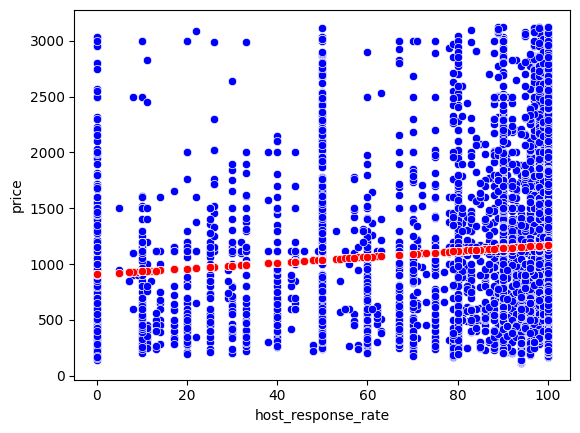

In [169]:
sns.scatterplot(x='host_response_rate', y='price', color='blue', data=datin)
sns.scatterplot(x='host_response_rate', y='Predicciones1', color='red', data=datin)

<Axes: xlabel='host_is_superhost', ylabel='price'>

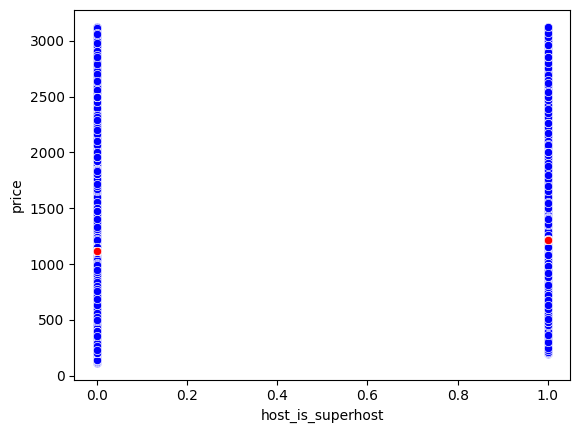

In [170]:
sns.scatterplot(x='host_is_superhost', y='price', color='blue', data=datin)
sns.scatterplot(x='host_is_superhost', y='Predicciones2', color='red', data=datin)

<Axes: xlabel='room_type', ylabel='price'>

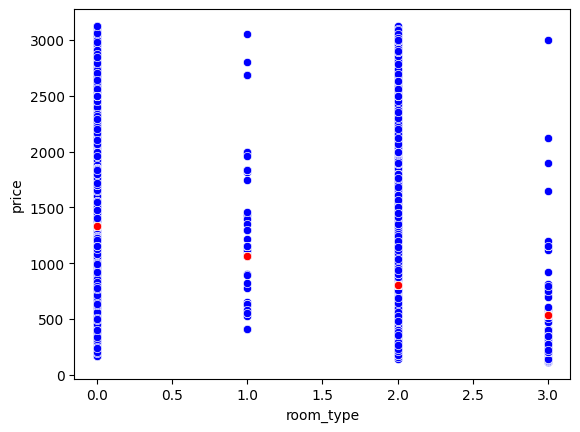

In [171]:

sns.scatterplot(x='room_type', y='price', color='blue', data=datin)
sns.scatterplot(x='room_type', y='Predicciones3', color='red', data=datin)

<Axes: xlabel='host_identity_verified', ylabel='price'>

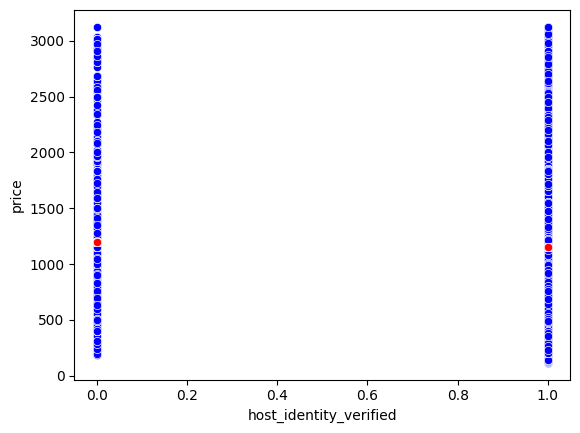

In [172]:
sns.scatterplot(x='host_identity_verified', y='price', color='blue', data=datin)
sns.scatterplot(x='host_identity_verified', y='Predicciones4', color='red', data=datin)

<Axes: xlabel='property_type', ylabel='price'>

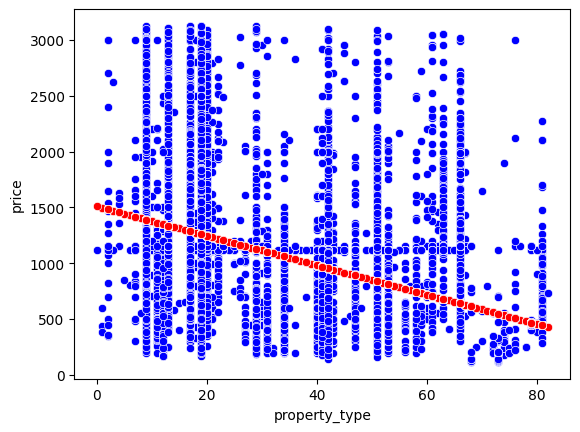

In [173]:
sns.scatterplot(x='property_type', y='price', color='blue', data=datin)
sns.scatterplot(x='property_type', y='Predicciones5', color='red', data=datin)

<Axes: xlabel='instant_bookable', ylabel='price'>

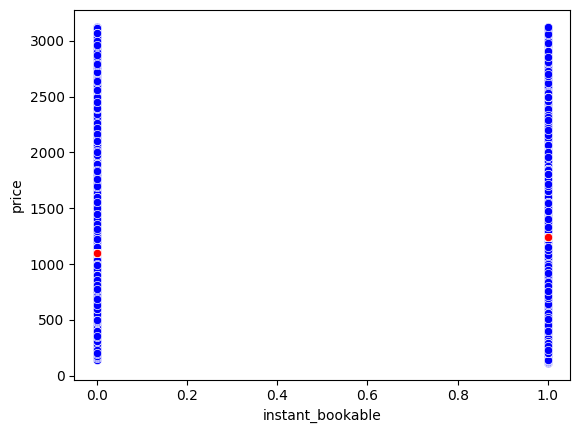

In [174]:
sns.scatterplot(x='instant_bookable', y='price', color='blue', data=datin)
sns.scatterplot(x='instant_bookable', y='Predicciones6', color='red', data=datin)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

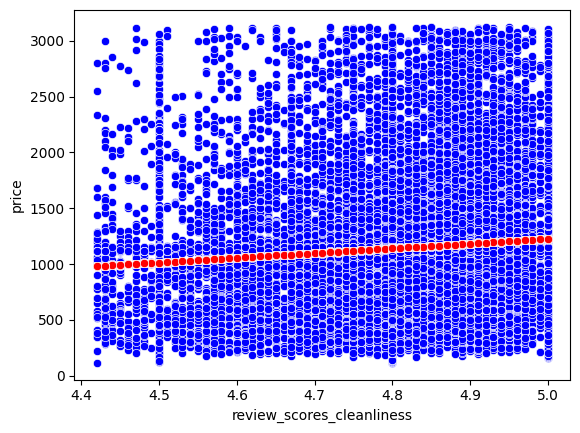

In [175]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color='blue', data=datin)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones7', color='red', data=datin)

<Axes: xlabel='bathrooms', ylabel='accommodates'>

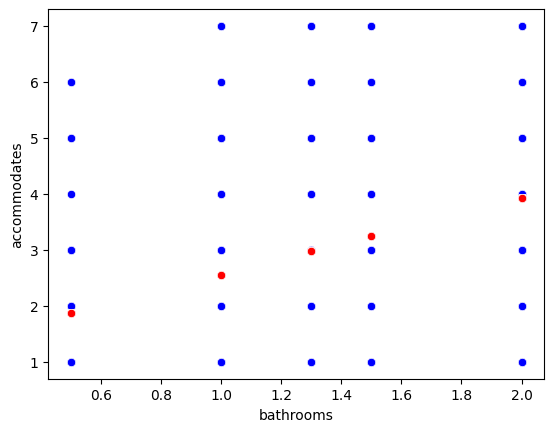

In [176]:
sns.scatterplot(x='bathrooms', y='accommodates', color='blue', data=datin)
sns.scatterplot(x='bathrooms', y='Predicciones8', color='red', data=datin)

In [177]:
coef_Deter= model.score(X=Var_Indep, y=Var_Dep)
coef_Deter

0.006966960034120784

In [178]:
coef_Deter2= model2.score(X=Var_Indep2, y=Var_Dep)
coef_Deter2

0.006859879616886166

In [179]:
coef_Deter3= model3.score(X=Var_Indep3, y=Var_Dep)
coef_Deter3

0.17685934758417587

In [180]:
coef_Deter4= model4.score(X=Var_Indep4, y=Var_Dep)
coef_Deter4

0.00025007291826995015

In [181]:
coef_Deter5= model5.score(X=Var_Indep5, y=Var_Dep)
coef_Deter5

0.12724411834830707

In [182]:
coef_Deter6= model6.score(X=Var_Indep6, y=Var_Dep)
coef_Deter6

0.01429625963280956

In [183]:
coef_Deter7= model7.score(X=Var_Indep7, y=Var_Dep)
coef_Deter7

0.008882976749923

In [184]:
coef_Deter8= model8.score(X=Var_Indep8, y=Var_Dep2)
coef_Deter8

0.12709322945278023

In [185]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.0834683175469638)

In [186]:
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.08282439022948594)

In [187]:
coef_Correl3=np.sqrt(coef_Deter2)
coef_Correl3

np.float64(0.08282439022948594)

In [188]:
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.015813694010886583)

In [189]:
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.3567129354933839)

In [190]:
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.11956696714732527)

In [191]:
coef_Correl7=np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.09424954509133188)

In [192]:
coef_Correl8=np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.3565013737039175)

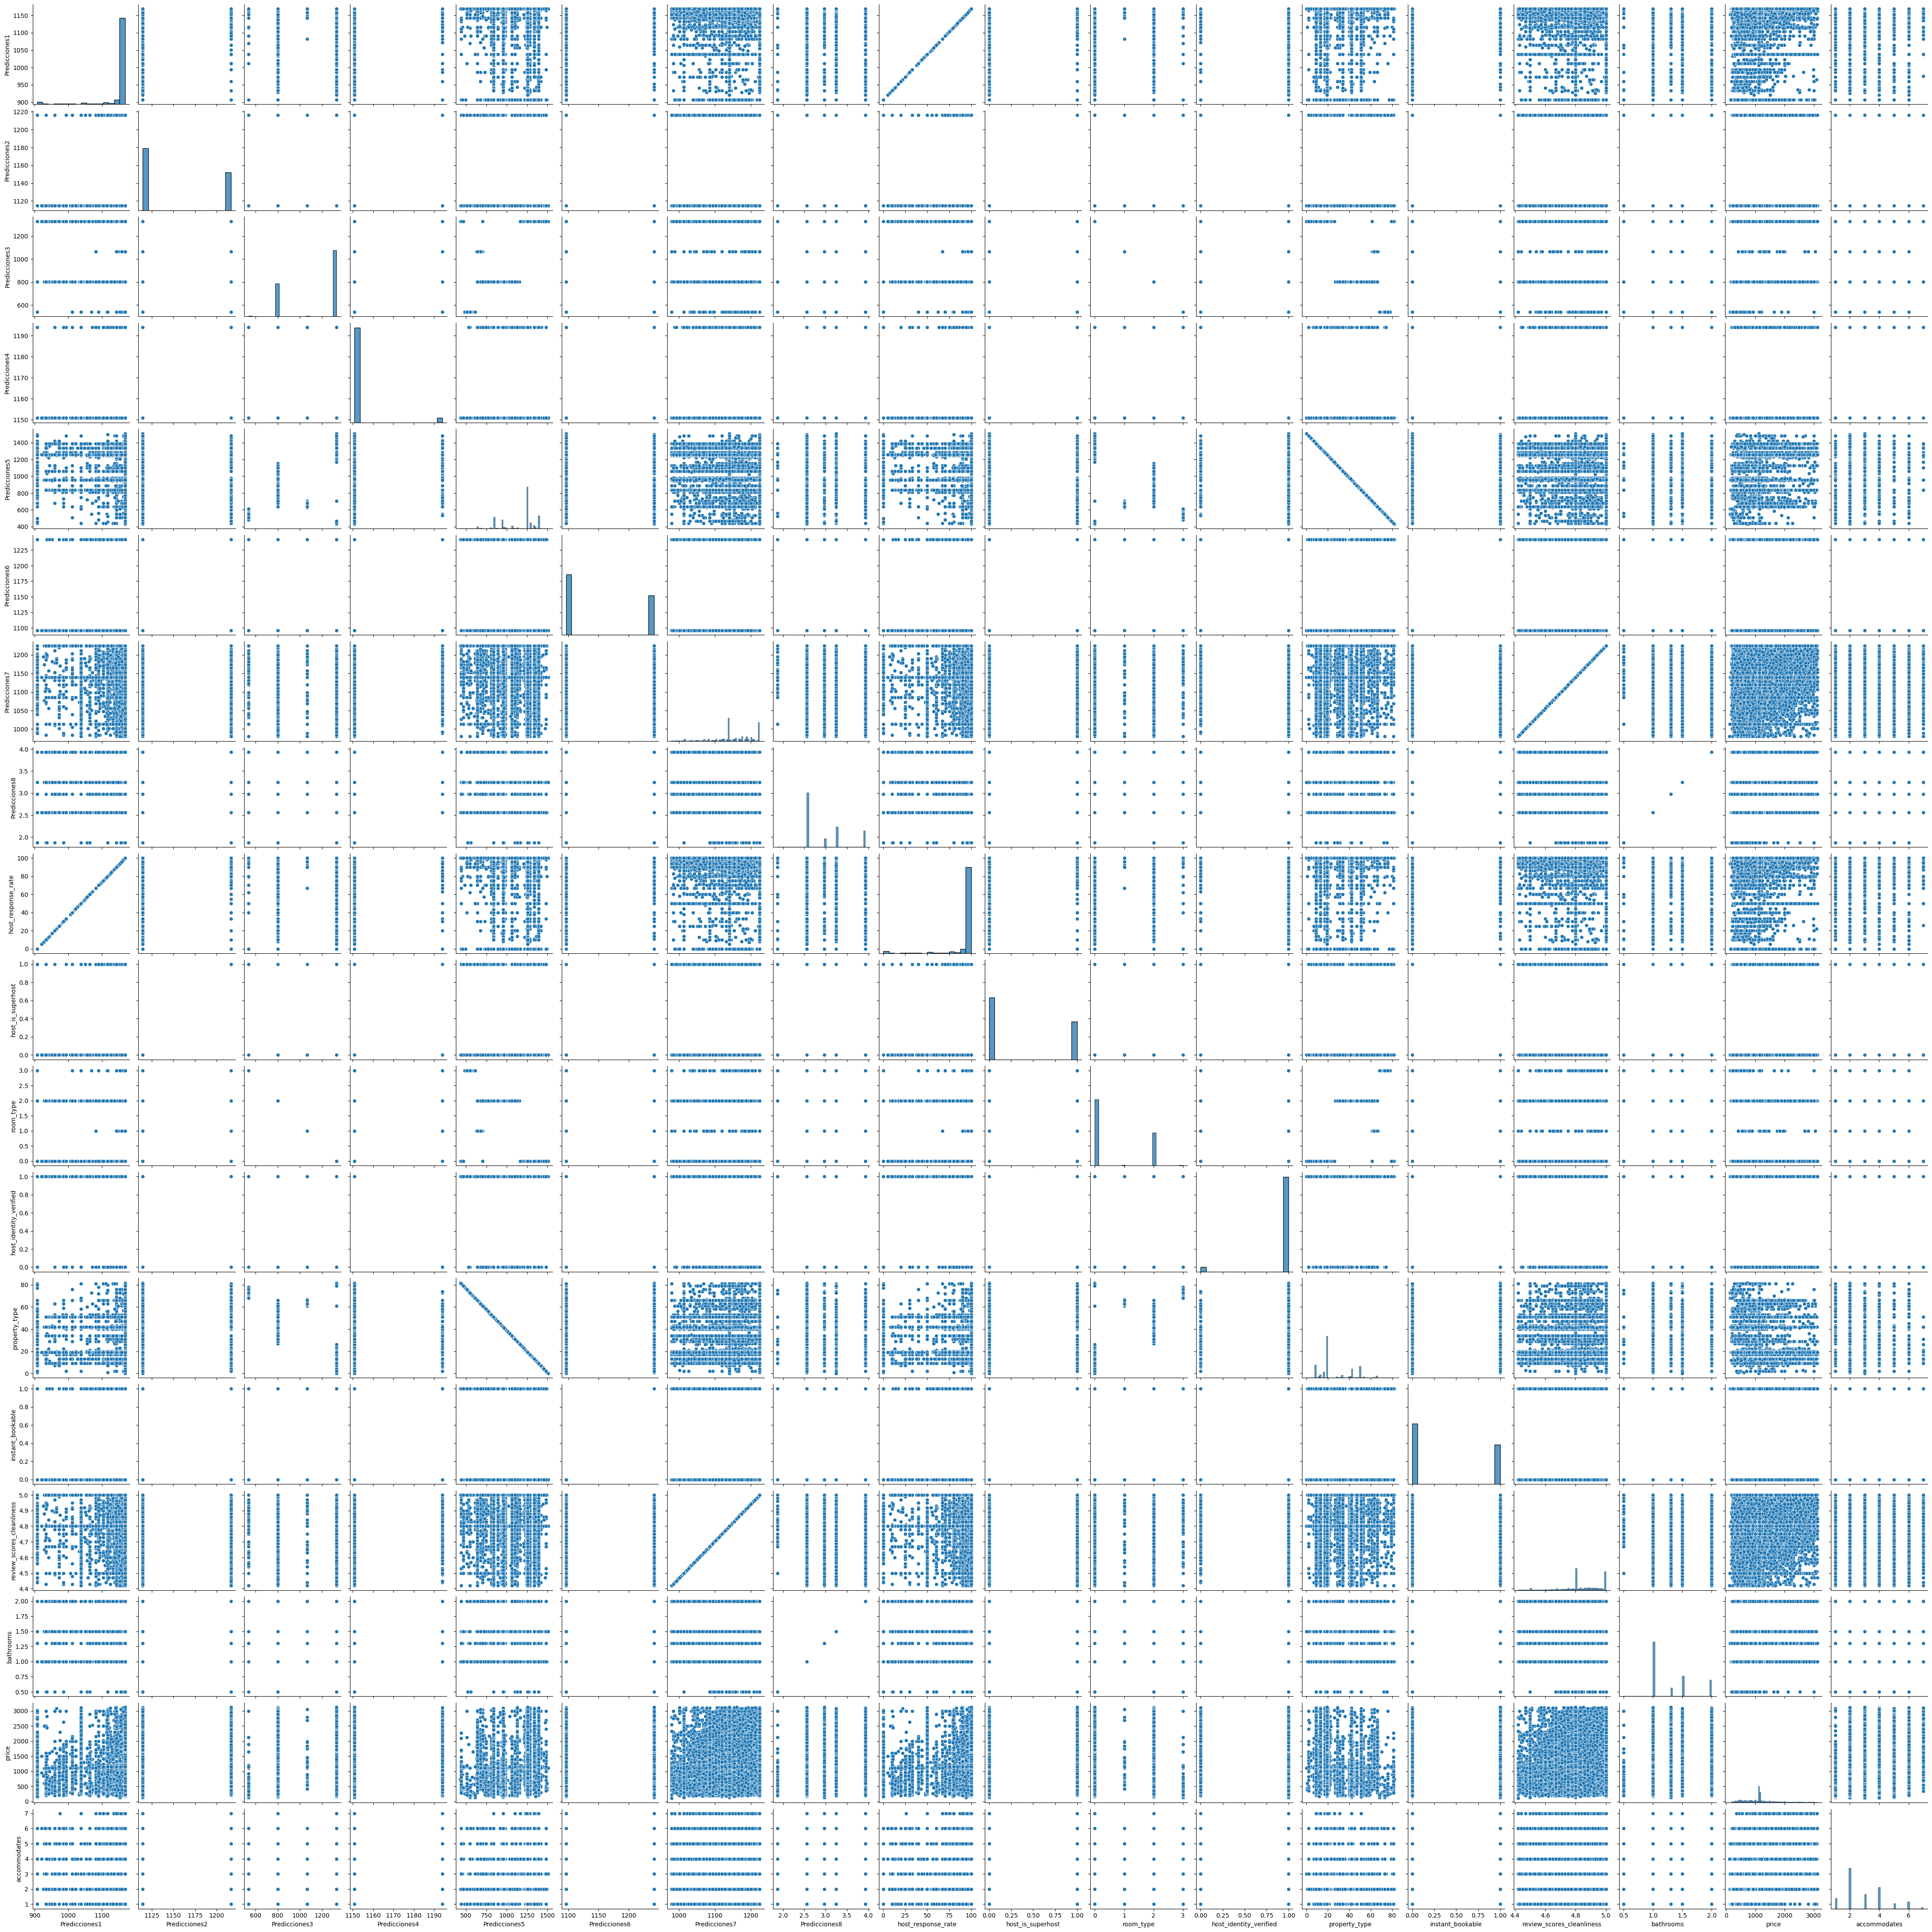

In [193]:
sns.pairplot(datin)

In [194]:
Corr_Factors= datin.corr()
Corr_Factors

Predicciones1  Predicciones2  Predicciones3  \
Predicciones1                   1.000000       0.177164       0.121777   
Predicciones2                   0.177164       1.000000       0.138248   
Predicciones3                   0.121777       0.138248       1.000000   
Predicciones4                   0.027751      -0.113568      -0.087488   
Predicciones5                   0.110883       0.123942       0.863114   
Predicciones6                   0.135759       0.048584       0.076396   
Predicciones7                   0.026888       0.191809       0.024494   
Predicciones8                   0.030460       0.003140       0.154157   
host_response_rate              1.000000       0.177164       0.121777   
host_is_superhost               0.177164       1.000000       0.138248   
room_type                      -0.121777      -0.138248      -1.000000   
host_identity_verified         -0.027759       0.113577       0.087473   
property_type                  -0.110883      -0.123942      -0.863114   
instant_bookable                0.135759       0.048584       0.076396   
review_scores_cleanliness       0.026888       0.191809       0.024494   
bathrooms                       0.030460       0.003140       0.154157   
price                           0.083468       0.082824       0.420546   
accommodates                    0.080093       0.092492       0.496536   

                           Predicciones4  Predicciones5  Predicciones6  \
Predicciones1                   0.027751       0.110883       0.135759   
Predicciones2                  -0.113568       0.123942       0.048584   
Predicciones3                  -0.087488       0.863114       0.076396   
Predicciones4                   1.000000      -0.095497      -0.090204   
Predicciones5                  -0.095497       1.000000       0.034082   
Predicciones6                  -0.090204       0.034082       1.000000   
Predicciones7                   0.013351       0.028779      -0.091721   
Predicciones8                   0.084202       0.155644      -0.008966   
host_response_rate              0.027751       0.110883       0.135759   
host_is_superhost              -0.113568       0.123942       0.048584   
room_type                       0.087488      -0.863114      -0.076396   
host_identity_verified         -1.000000       0.095478       0.090228   
property_type                   0.095497      -1.000000      -0.034082   
instant_bookable               -0.090204       0.034082       1.000000   
review_scores_cleanliness       0.013351       0.028779      -0.091721   
bathrooms                       0.084202       0.155644      -0.008966   
price                           0.015844       0.356713       0.119567   
accommodates                   -0.058010       0.450283       0.068761   

                           Predicciones7  Predicciones8  host_response_rate  \
Predicciones1                   0.026888       0.030460            1.000000   
Predicciones2                   0.191809       0.003140            0.177164   
Predicciones3                   0.024494       0.154157            0.121777   
Predicciones4                   0.013351       0.084202            0.027751   
Predicciones5                   0.028779       0.155644            0.110883   
Predicciones6                  -0.091721      -0.008966            0.135759   
Predicciones7                   1.000000       0.016645            0.026888   
Predicciones8                   0.016645       1.000000            0.030460   
host_response_rate              0.026888       0.030460            1.000000   
host_is_superhost               0.191809       0.003140            0.177164   
room_type                      -0.024494      -0.154157           -0.121777   
host_identity_verified         -0.013345      -0.084197           -0.027759   
property_type                  -0.028779      -0.155644           -0.110883   
instant_bookable               -0.091721      -0.008966            0.135759   
review_scores_cleanliness   

In [195]:
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

Predicciones1  Predicciones2  Predicciones3  \
Predicciones1                   1.000000       0.177164       0.121777   
Predicciones2                   0.177164       1.000000       0.138248   
Predicciones3                   0.121777       0.138248       1.000000   
Predicciones4                   0.027751       0.113568       0.087488   
Predicciones5                   0.110883       0.123942       0.863114   
Predicciones6                   0.135759       0.048584       0.076396   
Predicciones7                   0.026888       0.191809       0.024494   
Predicciones8                   0.030460       0.003140       0.154157   
host_response_rate              1.000000       0.177164       0.121777   
host_is_superhost               0.177164       1.000000       0.138248   
room_type                       0.121777       0.138248       1.000000   
host_identity_verified          0.027759       0.113577       0.087473   
property_type                   0.110883       0.123942       0.863114   
instant_bookable                0.135759       0.048584       0.076396   
review_scores_cleanliness       0.026888       0.191809       0.024494   
bathrooms                       0.030460       0.003140       0.154157   
price                           0.083468       0.082824       0.420546   
accommodates                    0.080093       0.092492       0.496536   

                           Predicciones4  Predicciones5  Predicciones6  \
Predicciones1                   0.027751       0.110883       0.135759   
Predicciones2                   0.113568       0.123942       0.048584   
Predicciones3                   0.087488       0.863114       0.076396   
Predicciones4                   1.000000       0.095497       0.090204   
Predicciones5                   0.095497       1.000000       0.034082   
Predicciones6                   0.090204       0.034082       1.000000   
Predicciones7                   0.013351       0.028779       0.091721   
Predicciones8                   0.084202       0.155644       0.008966   
host_response_rate              0.027751       0.110883       0.135759   
host_is_superhost               0.113568       0.123942       0.048584   
room_type                       0.087488       0.863114       0.076396   
host_identity_verified          1.000000       0.095478       0.090228   
property_type                   0.095497       1.000000       0.034082   
instant_bookable                0.090204       0.034082       1.000000   
review_scores_cleanliness       0.013351       0.028779       0.091721   
bathrooms                       0.084202       0.155644       0.008966   
price                           0.015844       0.356713       0.119567   
accommodates                    0.058010       0.450283       0.068761   

                           Predicciones7  Predicciones8  host_response_rate  \
Predicciones1                   0.026888       0.030460            1.000000   
Predicciones2                   0.191809       0.003140            0.177164   
Predicciones3                   0.024494       0.154157            0.121777   
Predicciones4                   0.013351       0.084202            0.027751   
Predicciones5                   0.028779       0.155644            0.110883   
Predicciones6                   0.091721       0.008966            0.135759   
Predicciones7                   1.000000       0.016645            0.026888   
Predicciones8                   0.016645       1.000000            0.030460   
host_response_rate              0.026888       0.030460            1.000000   
host_is_superhost               0.191809       0.003140            0.177164   
room_type                       0.024494       0.154157            0.121777   
host_identity_verified          0.013345       0.084197            0.027759   
property_type                   0.028779       0.155644            0.110883   
instant_bookable                0.091721       0.008966            0.135759   
review_scores_cleanliness   

<Axes: >

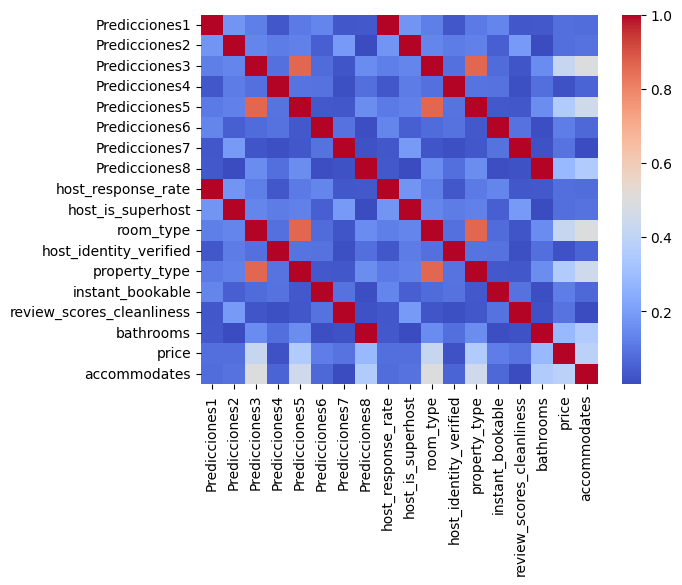

In [196]:
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'coolwarm')
Heart_Nap

<Axes: >

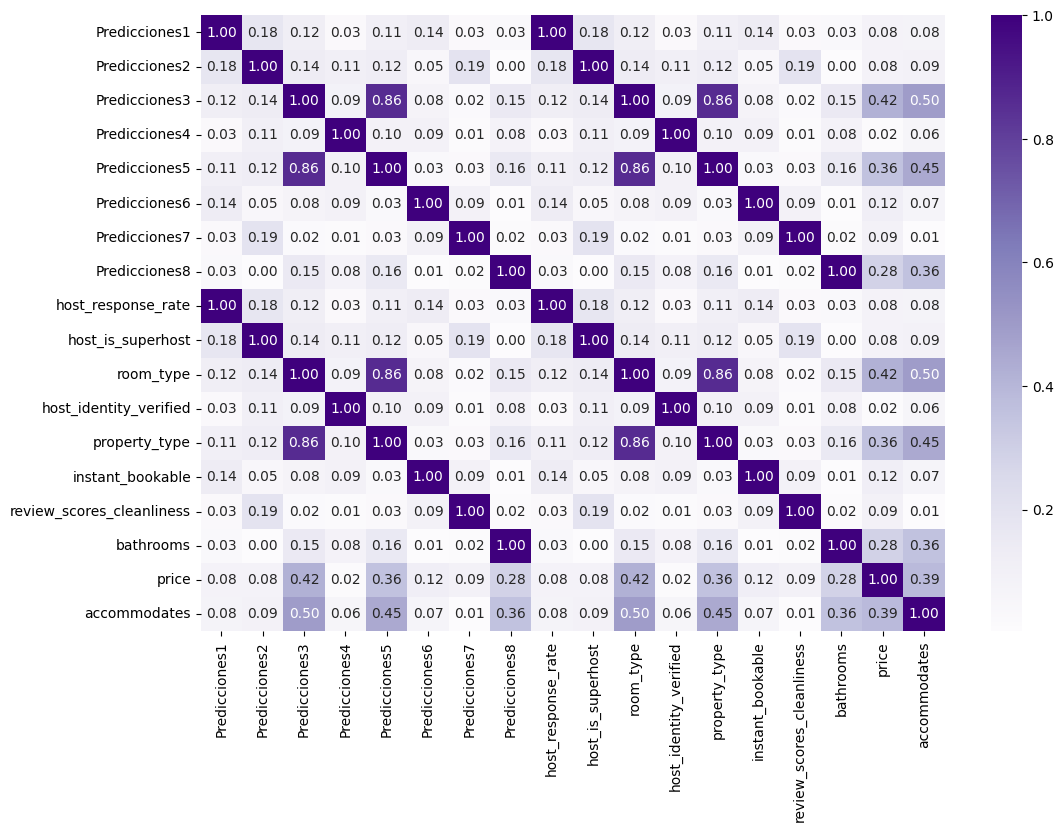

In [197]:
plt.figure(figsize=(12,8))
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'Purples', annot=True, fmt=".2f")
Heart_Nap

**Modelo Matematico**

In [198]:
tipos_alojamiento = datin['room_type'].unique()  # Obtener tipos de alojamiento únicos
datin_tipos = {tipo: datin[datin['room_type'] == tipo] for tipo in tipos_alojamiento}  # Crear diccionario con DataFrames filtrado

In [199]:
corr_results = {}

for tipo, datin_tipo in datin_tipos.items():
    # Seleccionar solo columnas numéricas
    datin_numerico = datin_tipo.select_dtypes(include=[np.number])

    # Calcular correlaciones con la variable 'price'
    correlaciones = datin_numerico.corr()['price'].dropna()

    # Obtener la variable con mayor correlación absoluta (positiva o negativa)
    mejor_variable = correlaciones.abs().idxmax()
    mejor_corr = correlaciones[mejor_variable]

    corr_results[tipo] = (mejor_variable, mejor_corr)

corr_results

{np.int64(0): ('price', np.float64(1.0)),
 np.int64(2): ('price', np.float64(1.0)),
 np.int64(1): ('price', np.float64(1.0)),
 np.int64(3): ('price', np.float64(1.0))}

In [200]:
#modelo de regrecion lineal
modelos = {}

for tipo, (variable, _) in corr_results.items():
    datin_tipo = datin_tipos[tipo].dropna(subset=[variable, 'price'])  # Eliminar valores nulos
    X = datin_tipo[[variable]]
    y = datin_tipo['price']

    # Entrenar modelo de regresión
    modelo = LinearRegression()
    modelo.fit(X, y)

    # Guardar modelo entrenado
    modelos[tipo] = (modelo, variable)
modelos

{np.int64(0): (LinearRegression(), 'price'),
 np.int64(2): (LinearRegression(), 'price'),
 np.int64(1): (LinearRegression(), 'price'),
 np.int64(3): (LinearRegression(), 'price')}

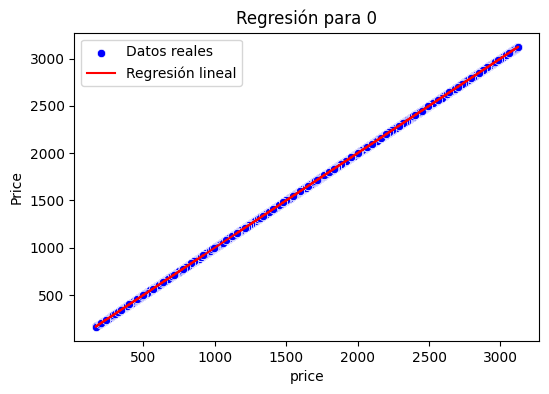

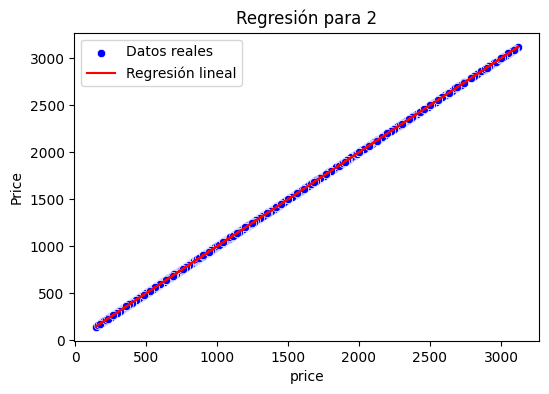

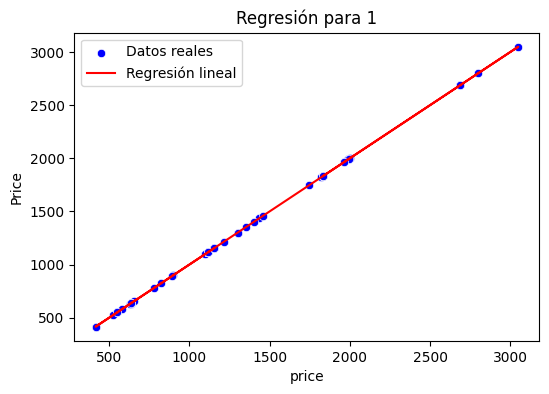

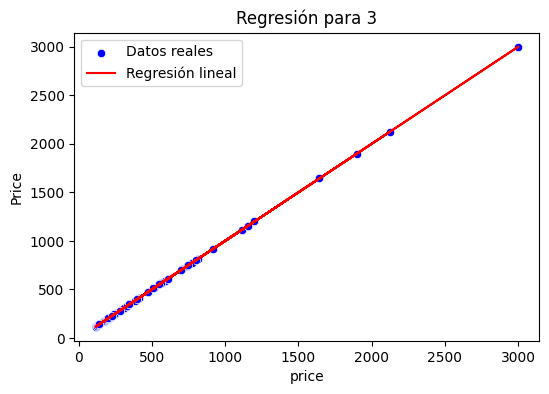

In [201]:
for tipo, (modelo, variable) in modelos.items():
    datin_tipo = datin_tipos[tipo].dropna(subset=[variable, 'price'])
    X = datin_tipo[[variable]]
    y = datin_tipo['price']
    y_pred = modelo.predict(X)

    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X[variable], y=y, color='blue', label="Datos reales")
    plt.plot(X[variable], y_pred, color='red', label="Regresión lineal")
    plt.xlabel(variable)
    plt.ylabel("Price")
    plt.title(f"Regresión para {tipo}")
    plt.legend()
    plt.show()

**Mejor Modelo de regrecion lineal para cada variable cuantitativa**



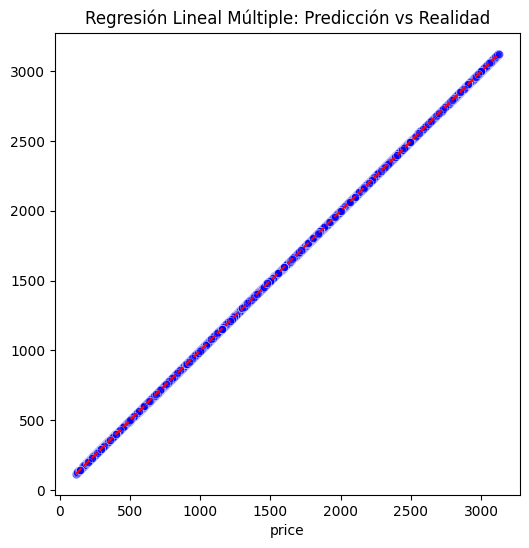

In [202]:
variables_cuantitativas= ['host_id', 'host_acceptance_rate', 'host_is_superhost', 'host_total_listings_count','room_type', 'reviews_per_month', 'review_scores_value', 'bedrooms', 'price', 'accommodates']
x = df[variables_cuantitativas]
y = df['price']
modelo = LinearRegression()
modelo.fit(x, y)
y_pred = modelo.predict(x)
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y, y=y_pred, color="blue", alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--")
plt.title("Regresión Lineal Múltiple: Predicción vs Realidad")
plt.show()